<div class="alert alert-info">
    <h1 align="center">WiDS Workshop October 2023</h1>
    <h3 align="center">Build Your Own AI Chatbot with GPT!</h3>
    <h5 align="center"><a href="https://www.linkedin.com/in/prasasthy-kb/">Prasasthy Balasubramanian</a></h5>
</div>

##  Objectives
- Designing, Developing, and Deploying custom Chatbots: Learn to design, develop, and deploy chatbots.
- Exploring GPT-3.5 Turbo: Explore the capabilities of GPT-3.5 Turbo.
- Utilizing Hugging Face Gradio to Launch Your Bot in Less Than 10 Minutes: Discover how to use Hugging Face Gradio for a chatbot launch in under 10 minutes.
- Overcoming Development Challenges: Address and overcome common development challenges.
- Importance of ethical considerations for building chatbots.

   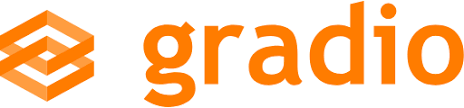 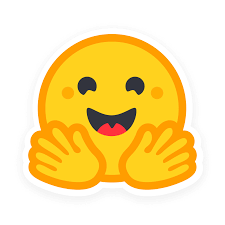 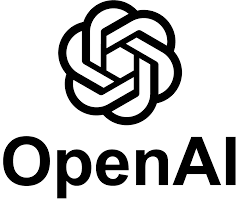

## Step1 : Building basic framework
In this workshop, you'll establish the foundation for creating custom chatbots by mastering the key stages of designing, developing, and deploying them. You'll then supercharge your chatbots by exploring the incredible capabilities of GPT-3.5 Turbo, enabling them to engage in natural and meaningful conversations. Finally, you'll streamline the process of launching your chatbot on the web using Hugging Face Gradio, providing a user-friendly interface that opens up a world of interactive possibilities for your AI-powered bot.

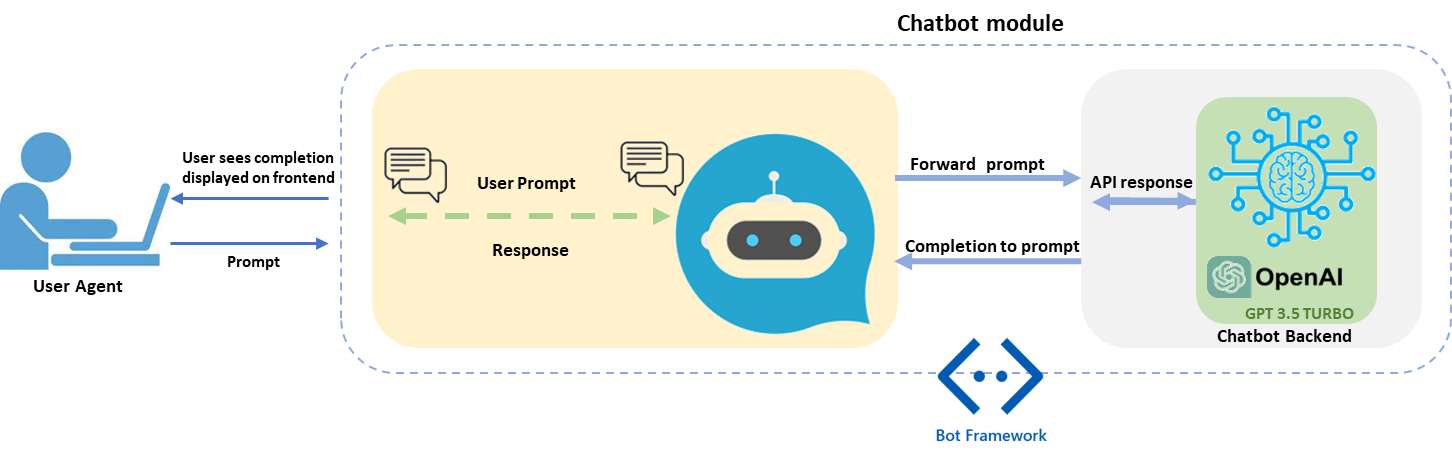

In [1]:
import gradio as gr
import openai
import random
import time

In [2]:
# Set up OpenAI API key
openai.api_key = "Your openAI API key"

In [3]:
messages=[
    {'role': 'system', "content": "A helpful assistant for the user."}
]

In [4]:
def user( history, text ):
    history = history + [(text, None)]
    return history, gr.update(value="", interactive=False)
        

def bot(history):
    asking_message = history[-1][0]
    response_message = use_gpt(asking_message)
    history[-1][1] = ""
    for character in response_message:
        history[-1][1] += character
        time.sleep(0.05)
        yield history

def use_gpt(message):
    messages.append({"role": "user", "content": message})
    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        messages=messages
    )
    ChatGPT_reply = response["choices"][0]["message"]["content"]
    messages.append({"role": "assistant", "content": ChatGPT_reply})
    return ChatGPT_reply

In [5]:
with gr.Blocks() as demo:
    chatbot = gr.Chatbot([], elem_id="chatbot")
    with gr.Row():
        with gr.Column():
            txt = gr.Textbox(
                show_label=False,
                placeholder="Enter text and press enter",
            )

    txt_msg =txt.submit(user, [chatbot, txt], [chatbot, txt], queue=False).then(
        bot, chatbot, chatbot
    )
    txt_msg.then(lambda: gr.update(interactive=True), None, [txt], queue=False)

demo.queue()
demo.launch()


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
